## PCA Image Compression


In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


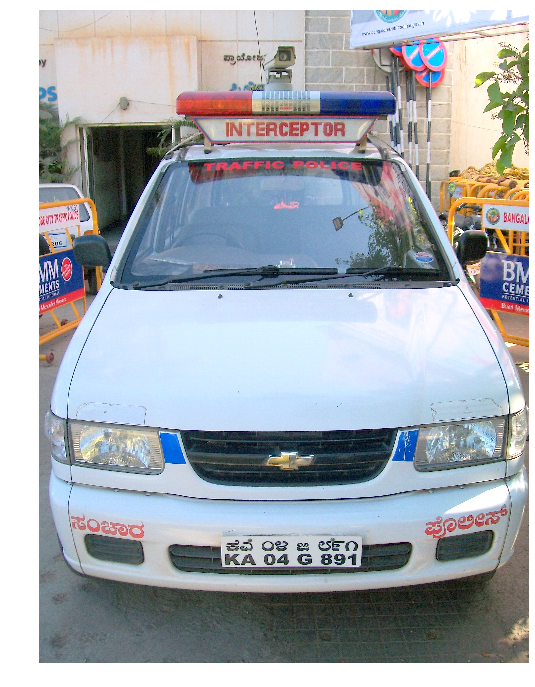

In [2]:
img = imread('car.png')
figure(figsize=(17,12)) 
axis("off")
imshow(img.astype(float))

### Convert to gray scale

(3264, 2448, 4)
(3264, 2448)


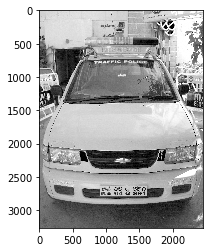

In [3]:
print(shape(img))
img = img[:,:,0]
full_pc = size(img,axis=0)
print(shape(img))
imshow(img.astype(float),cmap=gray())

In [4]:
def image_reduce(image_orig,num_components):

    sklearn_pca = PCA(num_components)
    Y_sklearn = sklearn_pca.fit_transform(image_orig)

    # Restore image
    image_reduced = sklearn_pca.inverse_transform(Y_sklearn)
    return image_reduced

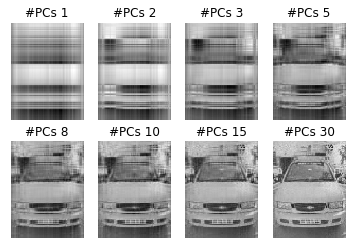

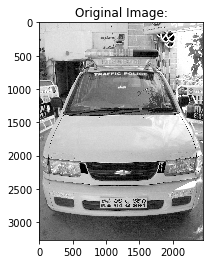

In [5]:
# Display Images with reduced number of components

j=1
for i in [1, 2, 3, 5, 8, 10, 15, 30]:
    low_dim_image = image_reduce(img,i)

    pl = subplot(2,4,j,frame_on=False)
    pl.xaxis.set_major_locator(NullLocator()) 
    pl.yaxis.set_major_locator(NullLocator())
    j += 1 
    imshow(low_dim_image.astype(float),cmap=gray())
    title('#PCs '+str(i))

   
figure()
imshow(img.astype(float),cmap=gray())
title('Original Image:')
show()

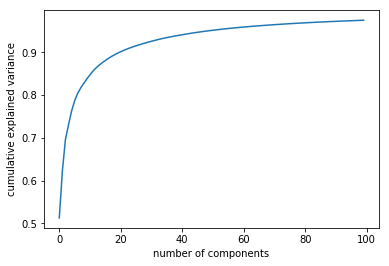

In [7]:
num_components = 100
sklearn_pca = PCA(num_components)
sklearn_pca.fit_transform(img)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plot(cumsum(sklearn_pca.explained_variance_ratio_))